Regresja (30%)
Zbiór danych: https://archive.ics.uci.edu/ml/datasets/Wine+Quality - białe wino
Jeden z algorytmów: decision tree, regresja logistyczna
Użyć pętli dla przetestowania różnych wybranych parametrów
Użyć cv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [2]:
wine = pd.read_csv("winequality-white.csv", sep= ";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#  pd.tools.plotting.scatter_matrix(wine[["..", "..",]], figsize=(11, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3B4A927B8>,
      dtype=object)

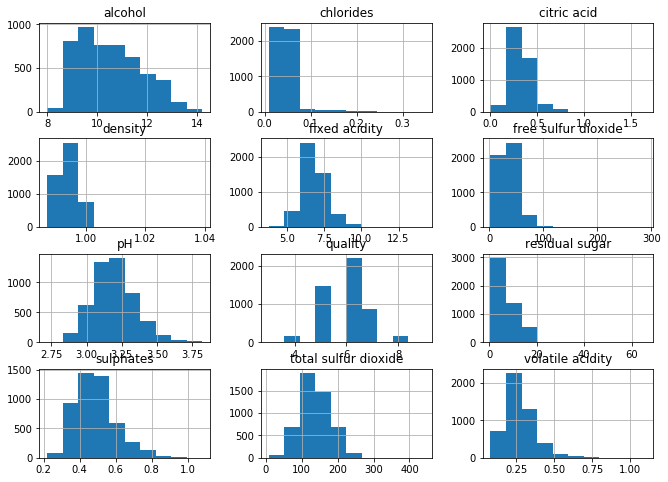

In [4]:
wine.hist(figsize=(11, 8))

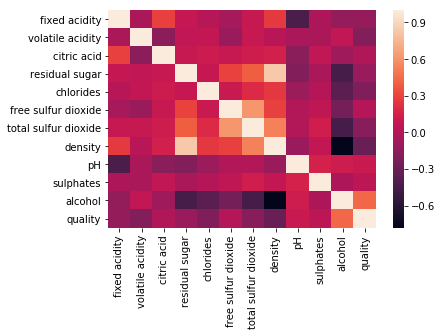

In [5]:
sns.heatmap(wine.corr())

In [6]:
X = pd.DataFrame(wine["density"]) #podział na zbiory Xi y
y = pd.Series(wine["residual sugar"])


from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
best_score = np.inf
parameters = {}

In [10]:
for depth in range (1,11):
    for min_split in range(2,21,3):
        for min_leaf in range(1,21,3):
            regressor = DecisionTreeRegressor(max_depth = depth,
                                              min_samples_split = min_split,
                                              min_samples_leaf = min_leaf)
            scores = cross_val_score(regressor, X_train, y_train, cv = 5)
            print("MSE: {} (std {})".format(scores.mean(), scores.std()))
            if scores.mean() < 0:
                pass
            elif scores.mean() < best_score:
                print("New best parameters!")
                parameters["best_depth"] = depth
                parameters["best_min_split"] = min_split
                parameters["best_min_leaf"] = min_leaf
                best_score = scores.mean()
                
# MSE jakość modelu                

MSE: 0.5674749308597813 (std 0.03724994178237434)
New best parameters!
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 0.03724994178237434)
MSE: 0.5674749308597813 (std 

MSE: 0.7471856188303774 (std 0.037372051937100415)
MSE: 0.7449259871815794 (std 0.039131024415080234)
MSE: 0.7493588474700614 (std 0.03223185431120385)
MSE: 0.7516838929500758 (std 0.0322629217249993)
MSE: 0.7471395328456917 (std 0.03527515023977964)
MSE: 0.7489537352715349 (std 0.03575433664721608)
MSE: 0.7476122446264852 (std 0.03604770390464454)
MSE: 0.7471856188303774 (std 0.037372051937100415)
MSE: 0.7449259871815794 (std 0.039131024415080234)
MSE: 0.7493588474700614 (std 0.03223185431120385)
MSE: 0.7516838929500758 (std 0.0322629217249993)
MSE: 0.7471395328456917 (std 0.03527515023977964)
MSE: 0.7489537352715349 (std 0.03575433664721608)
MSE: 0.7476122446264852 (std 0.03604770390464454)
MSE: 0.7471856188303774 (std 0.037372051937100415)
MSE: 0.7449259871815794 (std 0.039131024415080234)
MSE: 0.7493588474700614 (std 0.03223185431120385)
MSE: 0.7516838929500758 (std 0.0322629217249993)
MSE: 0.7471395328456917 (std 0.03527515023977964)
MSE: 0.7489537352715349 (std 0.0357543366472160

MSE: 0.7482221256041109 (std 0.03662945323342966)
MSE: 0.7460553168135569 (std 0.036404397892848814)
MSE: 0.7460603073061882 (std 0.037361787760835256)
MSE: 0.7436203116228274 (std 0.03712524768677245)
MSE: 0.7506719572421543 (std 0.03650139084214166)
MSE: 0.7503756245820943 (std 0.03250312014261753)
MSE: 0.747343652646349 (std 0.03490337990086967)
MSE: 0.7482221256041109 (std 0.03662945323342966)
MSE: 0.7460553168135569 (std 0.036404397892848814)
MSE: 0.7460603073061882 (std 0.037361787760835256)
MSE: 0.7436203116228274 (std 0.03712524768677245)
MSE: 0.7515591286494128 (std 0.03273232705116707)
MSE: 0.7527763577898134 (std 0.031970373277540695)
MSE: 0.7500001167647932 (std 0.03435594372611335)
MSE: 0.751652025749328 (std 0.03642384881421876)
MSE: 0.7496841157148822 (std 0.036955956896970885)
MSE: 0.7482463600377185 (std 0.038448289136400915)
MSE: 0.7449938483479827 (std 0.03804268465581258)
MSE: 0.748553658450193 (std 0.03505173875377814)
MSE: 0.7527763577898134 (std 0.031970373277540

In [11]:
parameters

{'best_depth': 1, 'best_min_split': 2, 'best_min_leaf': 1}

In [12]:
regressor = DecisionTreeRegressor(max_depth = parameters["best_depth"],
                                  min_samples_split = parameters["best_min_split"],
                                  min_samples_leaf = parameters["best_min_leaf"])

In [13]:
regressor.fit(X = X, y = y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
X

,density
0,1.00100
1,0.99400
2,0.99510
3,0.99560
4,0.99560
5,0.99510
6,0.99490
7,1.00100
8,0.99400
9,0.99380


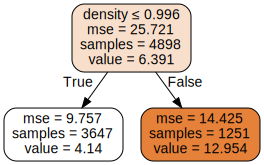

In [15]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(regressor, out_file = None, 
                                feature_names = X.columns, 
                                filled = True, 
                                rounded = True, special_characters = True, class_names=True)
graph = graphviz.Source(dot_data)  
graph

In [16]:
graph.render("../output/boston") 

'../output/boston.pdf'